In [1]:
import numpy as np
import matplotlib.pyplot as plt

V1a = [ 0.    3.25  8.06 12.97 17.81 22.7 ]
V2a = [0.    0.1   0.215 0.36  0.461 0.511]
Vled1a = [0.   1.75 1.94 2.03 2.19 2.3 ]
Vled2a = [12.05  11.95  11.835 11.69  11.589 11.539]
Iled1a = [0.         0.00331633 0.00822449 0.01323469 0.01817347 0.02316327]
Iled2a = [0.00000000e+00 9.64320154e-08 2.07328833e-07 3.47155256e-07
 4.44551591e-07 4.92767599e-07]
P1a = [0.         0.00580357 0.01595551 0.02686643 0.0397999  0.05327551]
P2a = [0.00000000e+00 1.15236258e-06 2.45373674e-06 4.05824494e-06
 5.15190839e-06 5.68604532e-06]


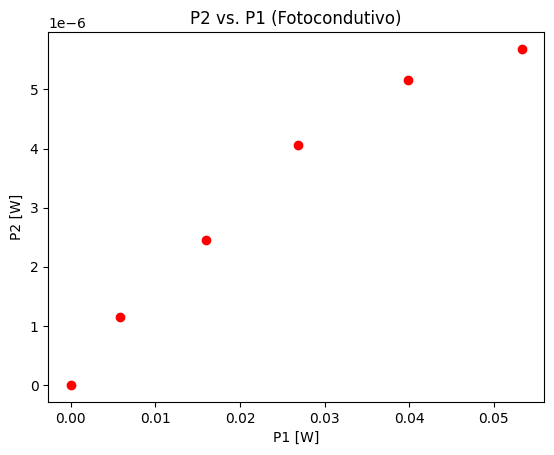

In [10]:
# Parte-I: Fotocondutivo
R1 = 980  # [ohms]
R2 = 1.037e6   # [ohms]

Vdc1a = np.array([0, 5, 10, 15, 20, 25])
Vdc2a = 12.05  # [V]
V1a = np.array([0, 3.25, 8.06, 12.97, 17.81, 22.7])
print("V1a =", V1a)
V2a = np.array([0, 100e-3, 215e-3, 360e-3, 461e-3, 511e-3])
print("V2a =", V2a)
Vled1a = Vdc1a - V1a
print("Vled1a =", Vled1a)
Vled2a = Vdc2a - V2a
print("Vled2a =", Vled2a)
Iled1a = V1a / R1
print("Iled1a =", Iled1a)
Iled2a = V2a / R2
print("Iled2a =", Iled2a)
P1a = Vled1a * Iled1a
print("P1a =", P1a)
P2a = Vled2a * Iled2a
print("P2a =", P2a)

plt.plot(P1a, P2a, 'or')
plt.title('P2 vs. P1 (Fotocondutivo)')
plt.xlabel('P1 [W]')
plt.ylabel('P2 [W]')
plt.show()

0.0001298962366666385


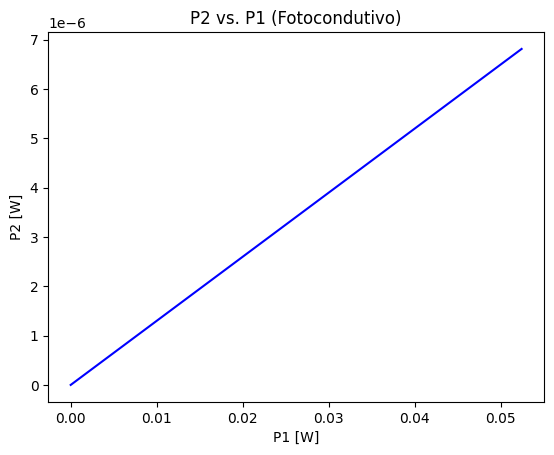

In [3]:
# Ajuste Linear da Parte-I
g = P1a  # Função Base
f = P2a
eta = np.sum(f * g) / np.sum(g * g)  # Ajuste da Constante do Modelo
print(eta)

plt.figure(1)
N = 100
x = np.linspace(0, np.max(P1a), N)
y = eta * x
plt.plot(x, y, 'b')
plt.title('P2 vs. P1 (Fotocondutivo)')
plt.xlabel('P1 [W]')
plt.ylabel('P2 [W]')
plt.show()

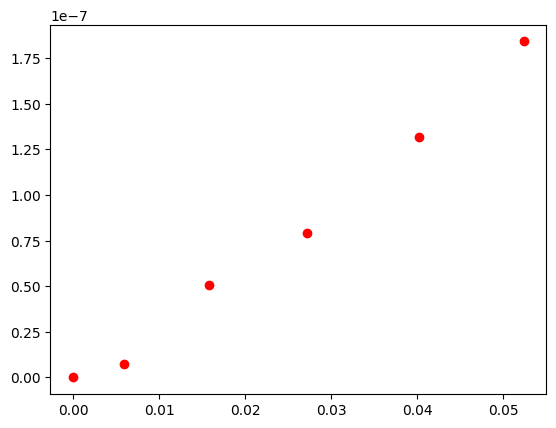

In [4]:
# Parte-II: Fotovoltaico
Vdc1b = np.array([0, 5, 10, 15, 20, 25])
V1b = np.array([0, 3.12, 8.05, 12.90, 17.74, 22.7])
V2b = np.array([0, -86.5e-3, -224e-3, -280e-3, -361e-3, -427e-3])
Vled1b = Vdc1b - V1b
Vled2b = V2b
Iled1b = V1b / R1
Iled2b = V2b / R2
P1b = Vled1b * Iled1b
P2b = Vled2b * Iled2b

plt.figure(2)
plt.plot(P1b, P2b, 'or')
plt.show()

3.329662040990894e-06


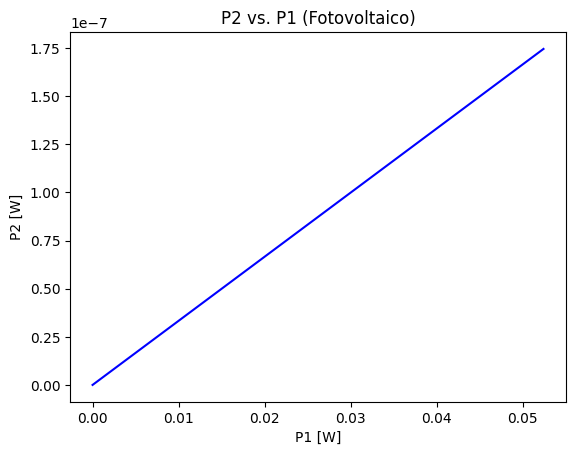

In [5]:
# Ajuste Linear da Parte-II
g = P1b  # Função Base
f = P2b
eta = np.sum(f * g) / np.sum(g * g)  # Ajuste da Constante do Modelo
print(eta)

plt.figure(2)
N = 100
x = np.linspace(0, np.max(P1b), N)
y = eta * x
plt.plot(x, y, 'b')
plt.title('P2 vs. P1 (Fotovoltaico)')
plt.xlabel('P1 [W]')
plt.ylabel('P2 [W]')
plt.show()

In [6]:
# Parte-III: I vs V Fotovoltaico
R = np.array([96e3, 196e3, 311e3, 398e3, 500e3, 640e3, 720e3, 850e3, 1.10e6, 1.27e6, 1.5e6, 2.02e6])
V = np.array([-52e-3, -105e-3, -162e-3, -20e-3, -250e-3, -320e-3, -350e-3, -14e-3, -510e-3, -581e-3, -634e-3, -450e-3, -842e-3])
Rmult = 20e6
Reff = 1 / ((1 / R) + (1 / Rmult))
Reff[-1] = 20e6  # Correção: Aqui apenas R do multímetro.
I = V / Reff
IL = I[0]  # IL ~ I(R pequeno), V ~ 0

plt.figure(3)
plt.plot(V, I, 'ro')
plt.plot(V, I, 'b')
plt.xlim([0, 1.4])
plt.ylim([0, 6e-7])
plt.title('I vs. V (Modo Fotovoltaico)')
plt.xlabel('V [volt]')
plt.ylabel('I [A]')
plt.show()

ValueError: operands could not be broadcast together with shapes (13,) (12,) 